## Numeryczne Rozwiązywanie Równań Różniczkowych Cząstkowych
### Uniwersytet Jagielloński 2025
Katedra Teorii Optymalizacji i Sterowania UJ


# Metoda elementów skończonych


## Laboratorium VI

##Podejście wariacyjne
------
Weźmy RRC::

$$
\mathbf{A} u(x) = f(x)
$$

gdzie $x=[x_1\ x_2\ \ldots\ x_n]$ oraz $\mathbf{A}$ to niekoniecznie liniowy operator różniczkowy. Szukamy przybliżonego rozwiązania:

$$
u_n = \sum^n_{i=1} a_i \xi_i
$$

gdzie $\xi_1, \xi_2, \ldots, \xi_n$ sa *funkcjami bazowymi*. Wstawiając $u_n$ do pierwszego równania otrzymujemy resztę (błąd) $\mathbf{E}$

$$
\mathbf{E} = \mathbf{A} u_n(x) - f(x)
$$

Następnie dobieramy współczynniki $a_i$ for $i=1,2,\ldots,n$ tak aby błąd $\mathbf{E}$ był ortogonalny do $\xi_i(x)$ (**dlaczego?**):

$$
\int_R \mathbf{E} \xi_i(x) \, \mathrm{d}R = \int_R \left[\mathbf{A} u_n(x) - f(x)\right] \xi_i(x) \, \mathrm{d}R = 0
$$

dla $i=1,2,\ldots,n$.


## Metoda Elementu Skończonego (Finite Element Method)
------
### Trójkątne elementy skończone

![element](https://what-when-how.com/wp-content/uploads/2012/06/tmpabe490_thumb_thumb.png)

Typowe funkje bazowe dla trójkątów są dane wzorem:

$$
\xi_i (x, y) = \frac{a_i + b_i x + c_i y}{2\Delta^A}
$$

gdzie $\Delta^A$ to pole trójkąta

$$
A = \left(
\begin{matrix}
  1 &   1 &   1 \\
x_i & x_j & x_k \\
y_i & y_j & y_k
\end{matrix}
\right)
$$
\,
$$
\left| det(A) \right| = 2 \Delta^A
$$

oraz

$$
\begin{align}
a_i &= x_j y_k - x_k y_j \\
b_i &= y_j - y_k \\
c_i &= x_k - x_j
\end{align}
$$

![element](http://what-when-how.com/wp-content/uploads/2012/06/tmpabe4108_thumb.png)

Uwaga: dla trójątnych elementów skończonych z liniowymi funkcjami bazowymi, całkowanie numeryczne jest dokładne!

<!-- ###Równania Równowagi Cauchy'ego -->

<!-- $$
\begin{align}
\frac{\partial \sigma_x}{\partial x} + \frac{\partial \tau_{xy}}{\partial y} +\frac{\partial \tau_{xz}}{\partial z} + X &= 0 \\
\frac{\partial \tau_{xy}}{\partial x} + \frac{\partial \sigma_y}{\partial y} +\frac{\partial \tau_{yz}}{\partial z} + Y &= 0 \\
\frac{\partial \tau_{xz}}{\partial x} + \frac{\partial \tau_{yz}}{\partial y} +\frac{\partial \sigma_z}{\partial z} + Z &= 0 \\
\end{align}
$$ -->

### Zasada prac wirtualnych
>A body is in equilibrium if and only if the virtual work of internal forces is equal to the virtual work of the external forces for any virtual displacement.

$$
\underbrace{\delta L^i}_{\substack{\text{Praca}\\\text{wewnętrznych sił}}} = \underbrace{\delta L^e}_{\substack{\text{Praca}\\\text{zewnętrnych sił}}}
$$

> Fizyka...

$$
\delta L^i = \iint_\Omega \underline{\sigma}^T \cdot \underline{\delta \epsilon}\, \mathrm{d}\Omega  
$$

$$
\delta L^e = \iint_\Omega \underline{X}^T \cdot \underline{\delta u}\, \mathrm{d}\Omega + \int_\Gamma \underline{t}^T \cdot \underline{\delta u}\, \mathrm{d}S
$$

Szukamy deformacji (w dwóch kierunkach $u$ ~ $x$, $v$ ~ $y$) nad jednym elementem, tj. uwzględniamy 3 funkcje bazowe:

$$
\underline{u}^e =
\left(
\begin{matrix}
u_e \\
v_e
\end{matrix}
\right)
= \underbrace{
\left(
\begin{matrix}
\xi^e_i &       0 & \xi^e_j &       0 & \xi^e_k &       0 \\
      0 & \xi^e_i &       0 & \xi^e_j &       0 & \xi^e_k
\end{matrix}
\right)}_{\mathbf{N}^e}
\underbrace{\left(
\begin{matrix}
u_i \\
v_i \\
u_j \\
v_j \\
u_k \\
v_k
\end{matrix}
\right)}_{\underline{u}^e_N}
$$

Najważniejszym elementem klasycznej mechaniki jest napięcie (strain) tj. *względna deformacja*. Jest ona zależna od deformacji:

$$
\underline{\epsilon}^e =
\left(
\begin{matrix}
\frac{\partial}{\partial x} &                           0 \\
                          0 & \frac{\partial}{\partial y} \\
\frac{\partial}{\partial x} & \frac{\partial}{\partial y}
\end{matrix}
\right)
\left(
\begin{matrix}
\xi^e_i &       0 & \xi^e_j &       0 & \xi^e_k &       0 \\
      0 & \xi^e_i &       0 & \xi^e_j &       0 & \xi^e_k
\end{matrix}
\right)
\left(
\begin{matrix}
u_i \\
v_i \\
u_j \\
v_j \\
u_k \\
v_k
\end{matrix}
\right)
$$

Składając wiedzę o elementach mamy:

$$
\underline{\epsilon}^e = \underbrace{\frac{1}{2 \Delta^A}
\left(
\begin{matrix}
b_i &   0 & b_j &   0 & b_k &   0 \\
  0 & c_i &   0 & c_j &   0 & c_k \\
b_i & c_i & b_j & c_j & b_k & c_k
\end{matrix}
\right)}_{\mathbf{B}^e}
\underline{u}^e_N
$$

$$
\underline{\epsilon}^e = \mathbf{B}^e \cdot \underline{u}^e_N
$$


Musimy jeszcze połączyć napięcie z naprężeniem... Dla *uproszczenia* zakładamy liniową sprężystość oraz przypadek izotropowy  (niezależny od kierunku), aby sformułować **prawo konsytutywne**:

$$
\underline{\sigma} =
\left(
\begin{matrix}
\sigma_x \\
\sigma_y \\
\tau_{xy}
\end{matrix}
\right)
= \underbrace{\frac{E}{1 - \nu^2}
\left(
\begin{matrix}
  1 & \nu &   0 \\
\nu &   1 &   0 \\
  0 &   0 & \frac{1-\nu}{2}
\end{matrix}
\right)}_{\mathbf{D} = \text{Konstytutywna Macierz Sprężystości}}
\left(
\begin{matrix}
\epsilon_x \\
\epsilon_y \\
\gamma_{xy}
\end{matrix}
\right)
$$

$$
\underline{\sigma} = \mathbf{D}^e \cdot \underline{\epsilon}
$$

$$
\delta L^i = \iint_{\Delta^A} \underline{\sigma}^T \cdot \underline{\delta \epsilon}\, \mathrm{d}A = \iint_{\Delta^A} \underline{\delta \epsilon}^T \cdot \underline{\sigma} \, \mathrm{d}A
$$

$$
\underline{\delta \epsilon} = \mathbf{B}^e \cdot \delta \underline{u}^e_N
$$

$$
\underline{\sigma} = \mathbf{D}^e \cdot \underline{\epsilon} = \mathbf{D}^e \mathbf{B}^e \underline{u}^e_N
$$

$$
\delta L^i = (\underline{u}^e_N)^T \iint_{\Delta^A} (\mathbf{B}^e)^T \mathbf{D}^e \mathbf{B}^e \underline{u}^e_N \, \mathrm{d}A = (\underline{u}^e_N)^T \left[ \Delta^A (\mathbf{B}^e)^T \mathbf{D}^e \mathbf{B}^e \right] \underline{u}^e_N
$$

Gdy mamy już lewą stronę musimy obliczyć prawą $\delta L^e$:

$$
\begin{align}
\delta L^e &= \iint_{\Delta^A} \underline{X}^T \mathbf{N}^e \delta \underline{u}^e_N\, \mathrm{d}A + \int_{\partial \Delta^A} \underline{t}^T \mathbf{N}^e \delta \underline{u}^e_N
\, \mathrm{d}S \\
&= (\delta \underline{u}^e_N)^T \underbrace{\left[ \iint_{\Delta^A} (\mathbf{N}^e)^T \underline{X} \, \mathrm{d}A + \int_{\partial \Delta^A} (\mathbf{N}^e)^T
\underline{t}\, \mathrm{d}S \right]}_{\underline{f}^e_N}
\end{align}
$$

Przyrównując obie strony mamy:

$$
(\delta \underline{u}^e_N)^T \cdot \Delta^A \left[ (\mathbf{B}^e)^T \mathbf{D}^e \mathbf{B}^e \right] \underline{u}^e_N = (\delta \underline{u}^e_N)^T \cdot \underline{f}^e_N
$$

Powyższy układ równań liniowych jest dla jednego elementu. Chcemy poołączyć wszystkie lokalne układy w jeden globalny następująco

$$
\mathbf{K} \vec{U} = \vec{F}
$$

gdzie $\mathbf{K}$ to macierz sztywności, $\vec{U}$ to niewiadome a $\vec{F}$ to siły zewnętrze.

# Implementacja

fem_data.py jest dostępne na githubie KOS-u

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

In [ ]:
from fem_data import TestSetup, Setup
setup = Setup()

Stałe

In [ ]:
DIMENSION = 2
NODES_PER_ELEMENT = 3

Mapowanie indeksów

In [ ]:
global_size = DIMENSION * len(setup.nodes)
ID = np.arange(global_size).reshape(-1, DIMENSION)

Finite Element class

In [ ]:
class FiniteElement:
    size = NODES_PER_ELEMENT * DIMENSION

    def __init__(self, e, setup):
        self.setup = setup

        # Calculate element element_eq_ids and coordinates
        # element_eq_ids has the equations associated to element e
        self.eq_ids = np.zeros(FiniteElement.size)
        self.coord = np.zeros((NODES_PER_ELEMENT, DIMENSION))

        z = 0
        for j in range(NODES_PER_ELEMENT):
            J = setup.elements[e, j] # global node of element
            for direction in range(DIMENSION):
                self.eq_ids[z] = ID[J, direction]
                z += 1

            self.coord[j] = setup.nodes[J]

        self.B, self.D, self.area = self.make_B_and_D_matrices_and_area()
        self.K, self.F = self.make_stiffness_matrix()

    def make_B_and_D_matrices_and_area(self):
        i = 0; j = 1; k = 2
        x = 0; y = 1
        E = self.setup.young_modulus
        p = self.setup.poisson_ratio

        coord = self.coord
        # ci =
        # cj =
        # ck =

        # bi =
        # bj =
        # bk =

        # det =
        area = det / 2

        # B =

        # D =

        return B, D, area

    def make_stiffness_matrix(self):
        Ke = self.B.T * self.D * self.B * self.area

        Fe1 = (self.area * self.setup.force[0]
            *  np.array([1/3, 0.0, 1/3, 0.0, 1/3, 0.0])  # x mask
            )

        Fe2 = (self.area * self.setup.force[1]
            *  np.array([0.0, 1/3, 0.0, 1/3, 0.0, 1/3])  # y mask
            )

        Fe = Fe1 + Fe2

        return Ke, Fe

Budowanie układu równań

In [ ]:
K = np.zeros((global_size, global_size))
F = np.zeros((global_size, 1))

for e in range(len(setup.elements)):
    element = FiniteElement(e, setup)

    for i in range(FiniteElement.size):
        I = int(element.eq_ids[i])
        for j in range(FiniteElement.size):
            J = int(element.eq_ids[j])
            # Adds element matrix K to global matrix K
            K[I, J] += element.K[i,j]
        # Adds load element vector F in F
        F[I] += element.F[i]

Warunek brzegowy Neumann'a

In [ ]:
for node, dof, value in setup.neumann:
    i = ID[int(node), int(dof)]  # >_<

    # we want to increase force on the boundary
    ...

Warunek brzegowy Dirichlet'a

In [ ]:
for node, direction, value in setup.dirichlet:
    i = ID[int(node), int(direction)]  # >_<
    F[:, 0] = F[:, 0] - value * K[:, i]

    # we want to remove one equation
    ...

Rozwiązywanie

In [ ]:
displacement = np.linalg.solve(K, F).reshape(len(setup.nodes), DIMENSION)

In [ ]:
# for vizualization
FACTOR = 100

displaced_nodes = ...

Wyrysowanie

In [ ]:
def view_mesh(nodes, elements, label, node_color='r', edge_color='k'):
    graph = nx.Graph()
    for i, j, k in elements:
        graph.add_edge(i,j)
        graph.add_edge(i,k)
        graph.add_edge(j,k)

    node_size = 20 + (1000 / len(setup.nodes))

    nx.draw(graph, pos=nodes, label=label, node_color=node_color,
            edge_color=edge_color, node_size=node_size)

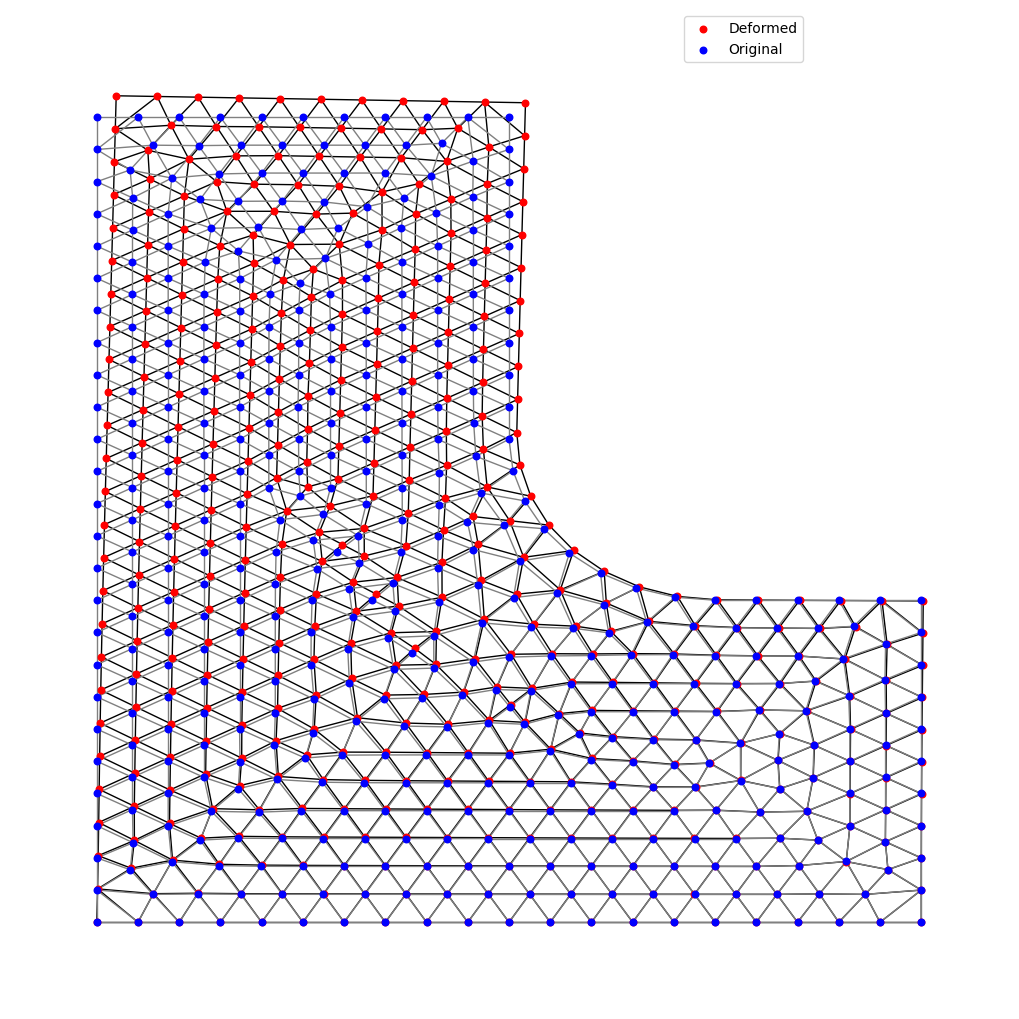

In [ ]:
f = plt.figure()
view_mesh(displaced_nodes, setup.elements, label='Deformed')
view_mesh(setup.nodes, setup.elements, label='Original',
          node_color='b', edge_color='0.5')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()

plt.legend(handles=[handles[0], handles[2]], bbox_to_anchor=(0.8, 1),
           bbox_transform=plt.gcf().transFigure)

f.set_size_inches(10,10)
plt.show()

Napięcia

In [ ]:
def StressT3_EPT(element, UEl, s):

    StressE = element.D * element.B * UEl.T

    # Create 2D stress matrix
    S = np.zeros((DIMENSION, DIMENSION))
    S[0,0] = StressE[0]
    S[1,1] = StressE[1]
    S[1,0] = S[0,1] = StressE[2]

    # Stress in z direction is ZERO under plane stress conditions
    StressE = np.append(StressE, [[0]], axis=0)

    # Calculate principal stresses by finding the eigenvalues of S
    w, v = np.linalg.eig(S)
    s1, s2 = w

    # Von Mises Stress
    SVME = np.sqrt(s1 ** 2 - s1*s2 + s2 ** 2)

    # Tresca Stress
    STRE = 0.5 * np.abs(s1 - s2)

    return StressE, SVME, STRE

In [ ]:
count = np.zeros(len(setup.nodes))
Sx   = np.zeros(len(setup.nodes))
Sy   = np.zeros(len(setup.nodes))
Sxy  = np.zeros(len(setup.nodes))
Sz   = np.zeros(len(setup.nodes))
SVM  = np.zeros(len(setup.nodes))
STR  = np.zeros(len(setup.nodes))

for e in range(len(setup.elements)):
    element = FiniteElement(e, setup)
    UEl = np.zeros(FiniteElement.size)

    z = 0
    for j in range(NODES_PER_ELEMENT):
        J = setup.elements[e,j]
        for i in range(DIMENSION):
            UEl[z] = displacement[J,i]
            z += 1

    # Calls method that calculates element
    # stress StressE, von Mises stress SVME
    # and Tresca stress STRE
    StressE, SVME, STRE = StressT3_EPT(
        element,
        np.matrix(UEl),
        setup
        )

    i, j, k = setup.elements[e]

    Sx[i] = Sx[i] + StressE[0]
    Sx[j] = Sx[j] + StressE[0]
    Sx[k] = Sx[k] + StressE[0]

    Sy[i] = Sy[i] + StressE[1]
    Sy[j] = Sy[j] + StressE[1]
    Sy[k] = Sy[k] + StressE[1]

    Sxy[i] = Sxy[i] + StressE[2]
    Sxy[j] = Sxy[j] + StressE[2]
    Sxy[k] = Sxy[k] + StressE[2]

    Sz[i] = Sz[i] + StressE[3]
    Sz[j] = Sz[j] + StressE[3]
    Sz[k] = Sz[k] + StressE[3]

    SVM[i] = SVM[i] + SVME
    SVM[j] = SVM[j] + SVME
    SVM[k] = SVM[k] + SVME

    STR[i] = STR[i] + STRE
    STR[j] = STR[j] + STRE
    STR[k] = STR[k] + STRE

    count[i] += 1
    count[j] += 1
    count[k] += 1

# Divide by counters
for i in range(len(setup.nodes)):
    Sx[i]  = Sx[i] /count[i]
    Sy[i]  = Sy[i] /count[i]
    Sxy[i] = Sxy[i]/count[i]
    Sz[i]  = Sz[i] /count[i]
    SVM[i] = SVM[i]/count[i]
    STR[i] = STR[i]/count[i]

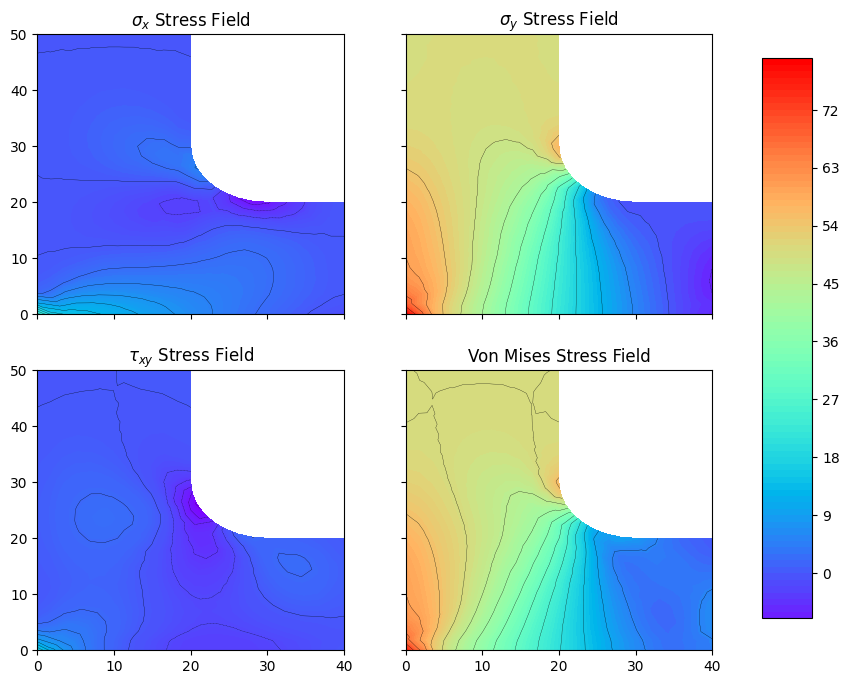

In [ ]:
# Only works for the LARGE CASE
x = setup.nodes[:,0]
y = setup.nodes[:,1]

# Choose with stress you want to vizualize:
# Sx, Sy, Sxy, SVM or STR
f, axes = plt.subplots(2, 2, sharex='col', sharey='row')

((ax1, ax2), (ax3, ax4)) = axes

vmin_Sx = min(Sx)
vmin_Sy = min(Sy)
vmin_Sxy = min(Sxy)
vmin_SVM = min(SVM)
vmin_STR = min(STR)
vmin = min([vmin_Sx, vmin_Sy, vmin_Sxy, vmin_SVM, vmin_STR])

vmax_Sx = max(Sx)
vmax_Sy = max(Sy)
vmax_Sxy = max(Sxy)
vmax_SVM = max(SVM)
vmax_STR = max(STR)
vmax = max([vmax_Sx, vmax_Sy, vmax_Sxy, vmax_SVM, vmax_STR])

linewidths = 0.2
n_layers = 100
ax1.tricontour(x, y, setup.elements, Sx, 15, linewidths=linewidths, colors='k')
im1 = ax1.tricontourf(x, y, setup.elements, Sx, n_layers, cmap=plt.cm.rainbow,
                      vmin=vmin, vmax=vmax)
ax1.set_title(r'$\sigma_x$' + ' Stress Field')

ax2.tricontour(x, y, setup.elements, Sy, 15, linewidths=linewidths, colors='k')
im2 = ax2.tricontourf(x, y, setup.elements, Sy, n_layers, cmap=plt.cm.rainbow,
                      vmin=vmin, vmax=vmax)
ax2.set_title(r'$\sigma_y$' + ' Stress Field')

ax3.tricontour(x, y, setup.elements, Sxy, 15, linewidths=linewidths, colors='k')
im3 = ax3.tricontourf(x, y, setup.elements, Sxy, n_layers, cmap=plt.cm.rainbow,
                      vmin=vmin, vmax=vmax)
ax3.set_title(r'$\tau_{xy}$' + ' Stress Field')

ax4.tricontour(x, y, setup.elements, SVM, 15, linewidths=linewidths, colors='k')
im4 = ax4.tricontourf(x, y, setup.elements, SVM, n_layers, cmap=plt.cm.rainbow,
                      vmin=vmin, vmax=vmax)
ax4.set_title('Von Mises Stress Field')

# ax4.tricontour(x, y, setup.elements, STR, 15, linewidths=linewidths, colors='k')
# im4 = ax4.tricontourf(x, y, setup.elements, STR, n_layers, cmap=plt.cm.rainbow,
#                      vmin=vmin, vmax=vmax)
# ax4.set_title('Tresca Stress Field')

f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
f.colorbar(im2, cax=cbar_ax)
f.set_size_inches(10,8)
plt.show()